In [2]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
x = torch.linspace(0,799, 800)

In [7]:
y = torch.sin(x*2*3.1416/40)

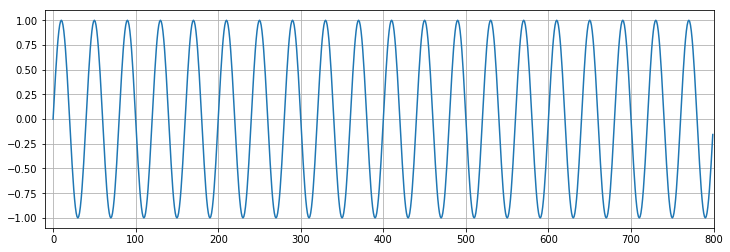

In [8]:
plt.figure(figsize=(12, 4))
plt.xlim(-10, 801)
plt.grid(True)
plt.plot(y.numpy())

In [14]:
test_size = 40
train_set = y[:-test_size]
test_set = y[-test_size:]

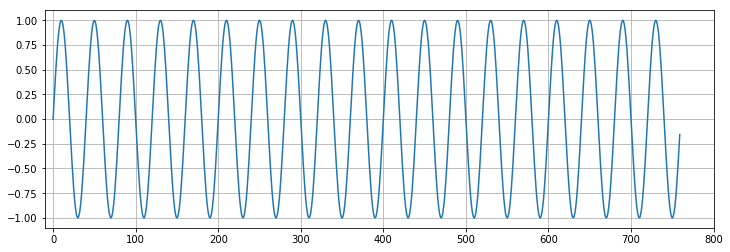

In [15]:
plt.figure(figsize=(12, 4))
plt.xlim(-10, 801)
plt.grid(True)
plt.plot(train_set.numpy())

In [16]:
def input_data(seq, ws):
    
    out = [] # ([0,1,2,3], [4]), ([,1,2,3,4], [5])
    L = len(seq)
    
    for i in range(L-ws):
        window = seq[i:i+ws]
        label = seq[i+ws:i+ws+1]
        out.append((window, label))
    
    return out

In [17]:
window_size = 40 # because the sin has a frequency of 40

train_data = input_data(train_set, window_size)


In [18]:
len(train_data)

720

In [19]:
train_data[0]

(tensor([ 0.0000e+00,  1.5643e-01,  3.0902e-01,  4.5399e-01,  5.8779e-01,
          7.0711e-01,  8.0902e-01,  8.9101e-01,  9.5106e-01,  9.8769e-01,
          1.0000e+00,  9.8769e-01,  9.5106e-01,  8.9100e-01,  8.0901e-01,
          7.0710e-01,  5.8778e-01,  4.5398e-01,  3.0901e-01,  1.5643e-01,
         -7.2400e-06, -1.5644e-01, -3.0902e-01, -4.5400e-01, -5.8779e-01,
         -7.0711e-01, -8.0902e-01, -8.9101e-01, -9.5106e-01, -9.8769e-01,
         -1.0000e+00, -9.8769e-01, -9.5105e-01, -8.9100e-01, -8.0901e-01,
         -7.0710e-01, -5.8777e-01, -4.5398e-01, -3.0900e-01, -1.5642e-01]),
 tensor([1.4480e-05]))

In [30]:
class LSTM(nn.Module):
    
    def __init__(self, input_size=1, hidden_size=50, out_size=1):
        
        super().__init__()
        self.hidden_size=hidden_size
        
        self.lstm = nn.LSTM(input_size, hidden_size)
        
        self.linear = nn.Linear(hidden_size, out_size)
        
        self.hidden = (torch.zeros(1,1,hidden_size), torch.zeros(1,1,hidden_size))
        
    def forward(self, seq):
        
        lstm_out, self.hidden = self.lstm(seq.view(len(seq), 1, -1), self.hidden)
        
        prediction = self.linear(lstm_out.view(len(seq), -1))
        
        return prediction[-1]
        

In [31]:
torch.manual_seed(42)
model = LSTM()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [32]:
model

LSTM(
  (lstm): LSTM(1, 50)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)

In [33]:
for p in model.parameters():
    print(p.numel())

200
10000
200
200
50
1


Epoch 0 Loss: 0.09212874621152878
Performance on test range: 0.6071590185165405


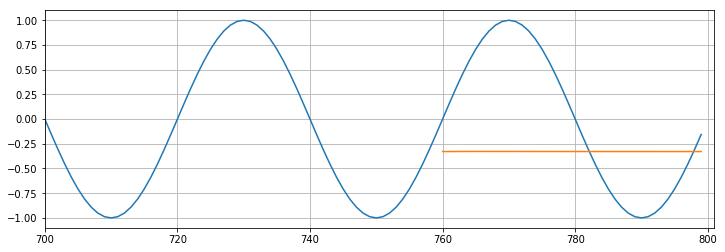

Epoch 1 Loss: 0.06506767123937607
Performance on test range: 0.565098762512207


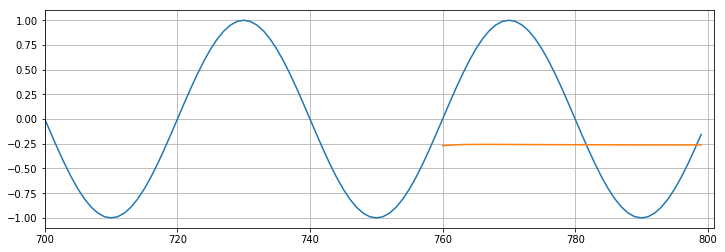

Epoch 2 Loss: 0.04198046773672104
Performance on test range: 0.5199716687202454


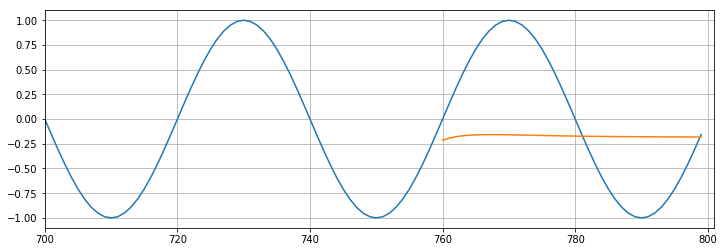

Epoch 3 Loss: 0.01784275658428669
Performance on test range: 0.42209967970848083


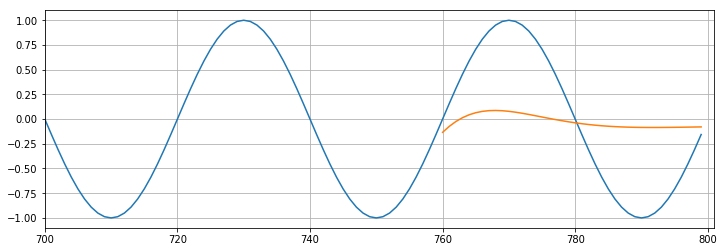

Epoch 4 Loss: 0.0028870997484773397
Performance on test range: 0.16624116897583008


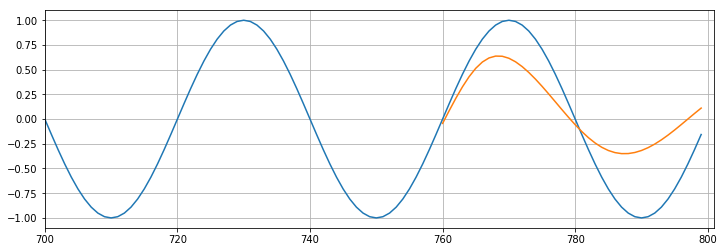

Epoch 5 Loss: 0.0003200757782906294
Performance on test range: 0.03055439703166485


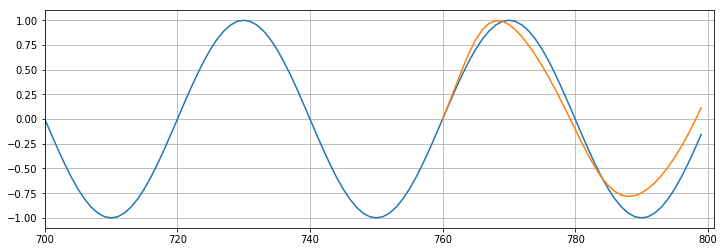

Epoch 6 Loss: 0.00012969104864168912
Performance on test range: 0.014990181662142277


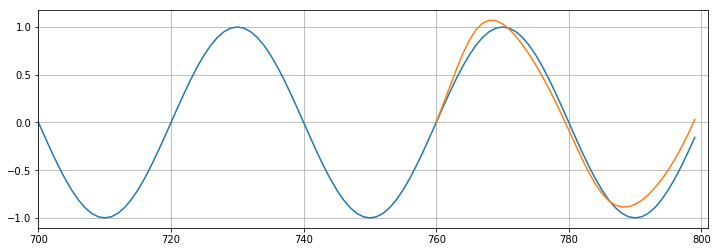

Epoch 7 Loss: 0.00012006733595626429
Performance on test range: 0.011856676079332829


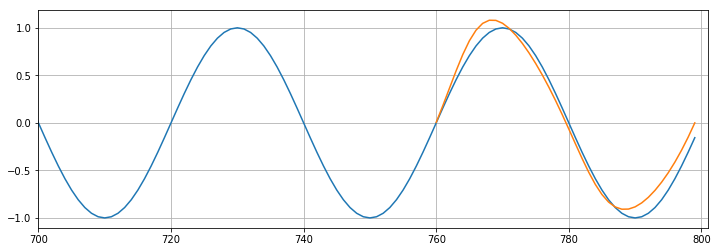

Epoch 8 Loss: 0.0001265565661014989
Performance on test range: 0.010163827799260616


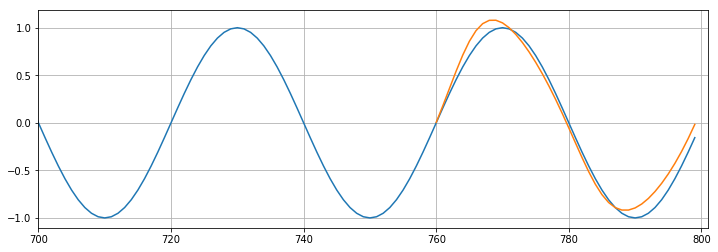

Epoch 9 Loss: 0.00013195407518651336
Performance on test range: 0.00889757089316845


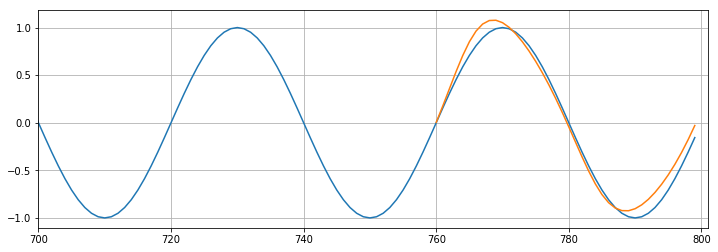

In [34]:
epochs = 10
future = 40

for i in range(epochs):
    
    for seq, y_train in train_data:
        
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                       torch.zeros(1,1,model.hidden_size))
        prediction = model(seq)
        loss = criterion(prediction, y_train)
        loss.backward()
        optimizer.step()
    
    print(f"Epoch {i} Loss: {loss.item()}")
    preds = train_set[-window_size:].tolist()
    
    for f in range(future):
        
        seq = torch.FloatTensor(preds[-window_size:])
        
        with torch.no_grad():
            
            model.hidden = (torch.zeros(1,1,model.hidden_size),
                            torch.zeros(1,1,model.hidden_size))
            
            preds.append(model(seq).item())
    
    loss = criterion(torch.tensor(preds[-window_size:]), test_set)
    print(f"Performance on test range: {loss}")
    
    plt.figure(figsize=(12, 4))
    plt.xlim(700, 801)
    plt.grid(True)
    plt.plot(y.numpy())
    plt.plot(range(760, 800), preds[window_size:])
    plt.show()

In [35]:
epochs = 15
window_size = 40
future = 40

all_data = input_data(y, window_size)
len(all_data)


760

In [36]:
import time
start_time = time.time()

for i in range(epochs):
    
    for seq, y_train in train_data:
        
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                       torch.zeros(1,1,model.hidden_size))
        prediction = model(seq)
        loss = criterion(prediction, y_train)
        loss.backward()
        optimizer.step()
    
    print(f"Epoch {i} Loss: {loss.item()}")

total_time = time.time() - start_time
print(total_time)

Epoch 0 Loss: 0.0001345030323136598
Epoch 1 Loss: 0.0001345821947325021
Epoch 2 Loss: 0.00013279209088068455
Epoch 3 Loss: 0.0001296662667300552
Epoch 4 Loss: 0.00012561386392917484
Epoch 5 Loss: 0.00012097590661142021
Epoch 6 Loss: 0.00011599756544455886
Epoch 7 Loss: 0.0001108607102651149
Epoch 8 Loss: 0.00010570746962912381
Epoch 9 Loss: 0.0001006296297418885
Epoch 10 Loss: 9.569484245730564e-05
Epoch 11 Loss: 9.094662527786568e-05
Epoch 12 Loss: 8.641312160762027e-05
Epoch 13 Loss: 8.210809028241783e-05
Epoch 14 Loss: 7.803594780853018e-05
191.14181900024414


# Forecast into unknown future

In [41]:
preds = y[-window_size:].tolist()

for i in range(future):
    seq = torch.FloatTensor(preds[-window_size:])

    with torch.no_grad():
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))
        preds.append(model(seq).item())
        
        

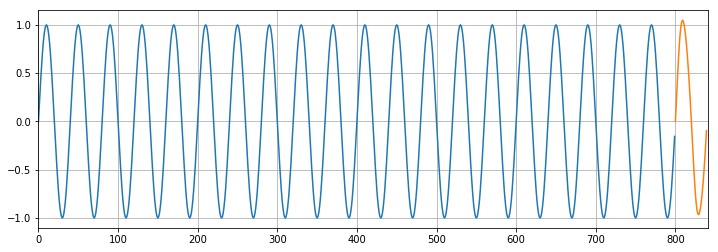

In [42]:
plt.figure(figsize=(12, 4))
plt.xlim(0, 841)
plt.grid(True)
plt.plot(y.numpy())
# Plotting forecast
plt.plot(range(800, 800 + future), preds[window_size:])
plt.show()